In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('../data/retail_store_data_with_real_items.csv')
data.head()

,Date,Day,Item Name,Price,In Stock,Total Stock,Sales,Stock Left,Revenue
0,2022-01-01,Saturday,Tea,11.65,True,64,19,45,221.35
1,2022-01-01,Saturday,Shaving Cream,36.52,True,78,23,55,839.96
2,2022-01-01,Saturday,All-Purpose Cleaner,13.58,True,109,28,81,380.24
3,2022-01-01,Saturday,Rice,6.30,True,187,14,173,88.20
4,2022-01-01,Saturday,Perfume,43.33,True,137,0,137,0.00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Date         109600 non-null  object 
 1   Day          109600 non-null  object 
 2   Item Name    109600 non-null  object 
 3   Price        109600 non-null  float64
 4   In Stock     109600 non-null  bool   
 5   Total Stock  109600 non-null  int64  
 6   Sales        109600 non-null  int64  
 7   Stock Left   109600 non-null  int64  
 8   Revenue      109600 non-null  float64
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 6.8+ MB


In [6]:
data['Item Name'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
109595    False
109596    False
109597    False
109598    False
109599    False
Name: Item Name, Length: 109600, dtype: bool

In [8]:
data['Date'] = pd.to_datetime(data['Date'])

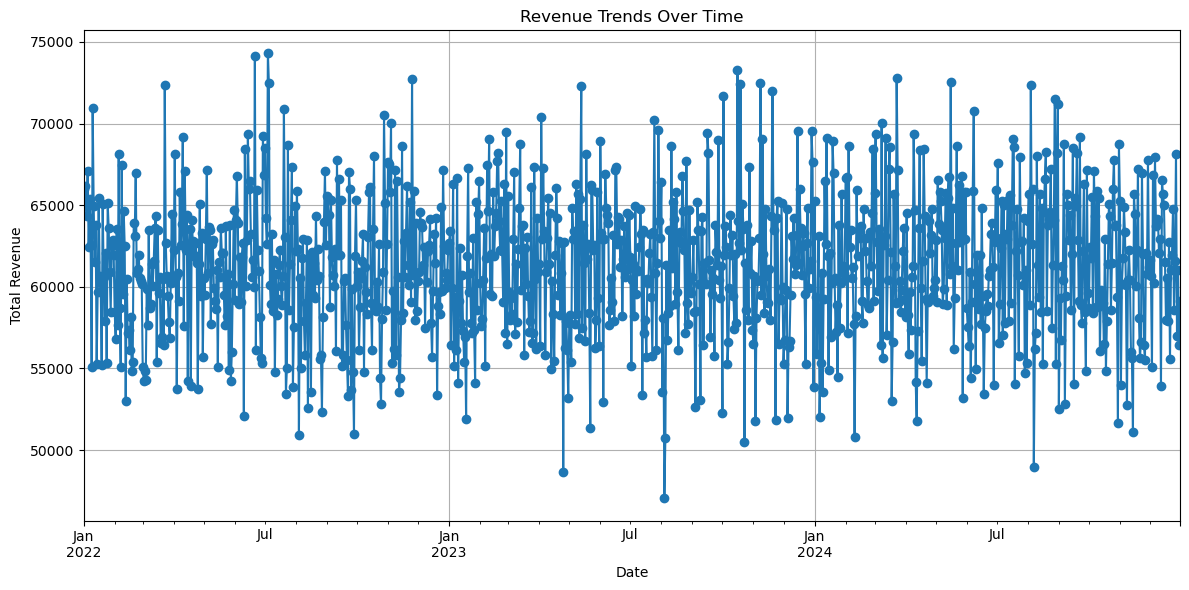

In [9]:
plt.figure(figsize=(12, 6))
data.groupby('Date')['Revenue'].sum().plot(kind='line', marker='o')
plt.title('Revenue Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

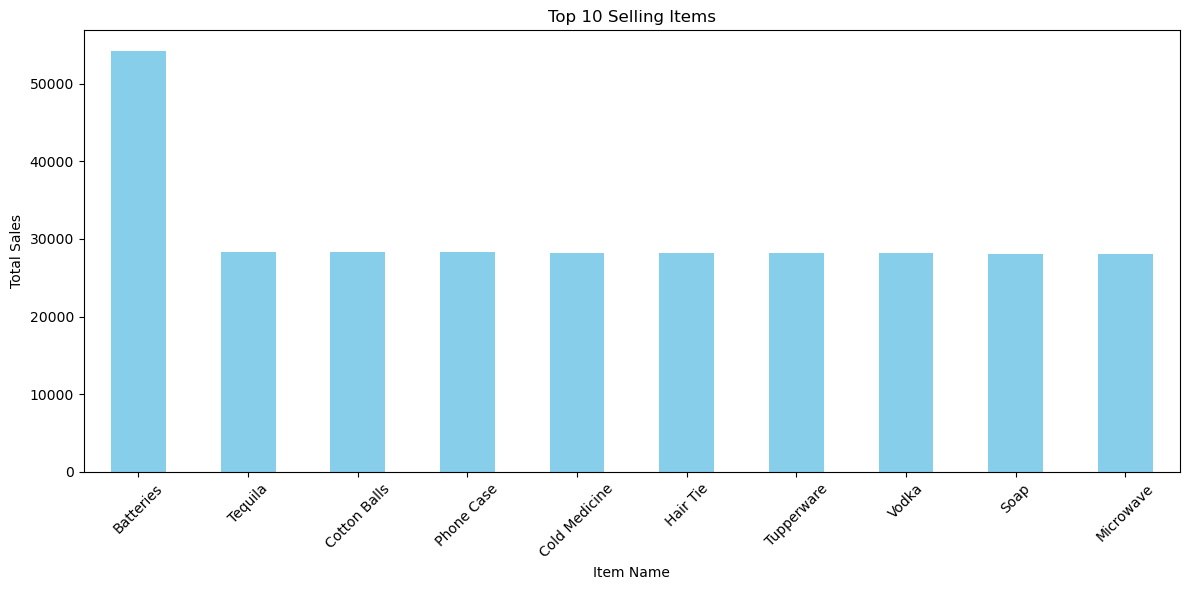

In [10]:
top_items = data.groupby('Item Name')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_items.plot(kind='bar', color='skyblue')
plt.title('Top 10 Selling Items')
plt.xlabel('Item Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


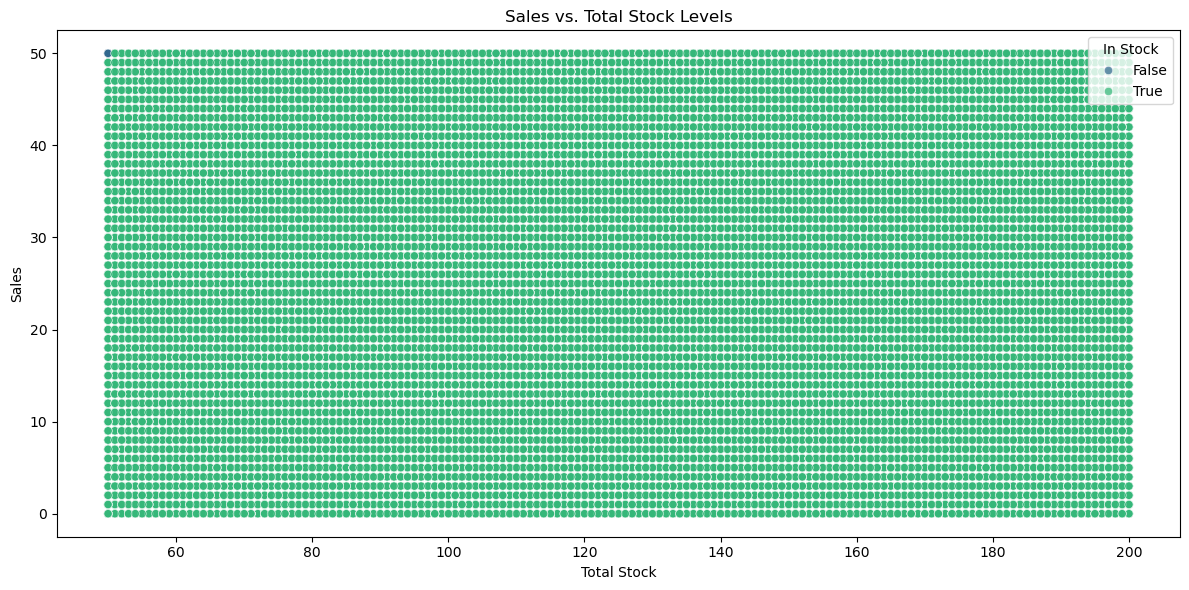

In [11]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Total Stock', y='Sales', hue='In Stock', palette='viridis', alpha=0.7)
plt.title('Sales vs. Total Stock Levels')
plt.xlabel('Total Stock')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

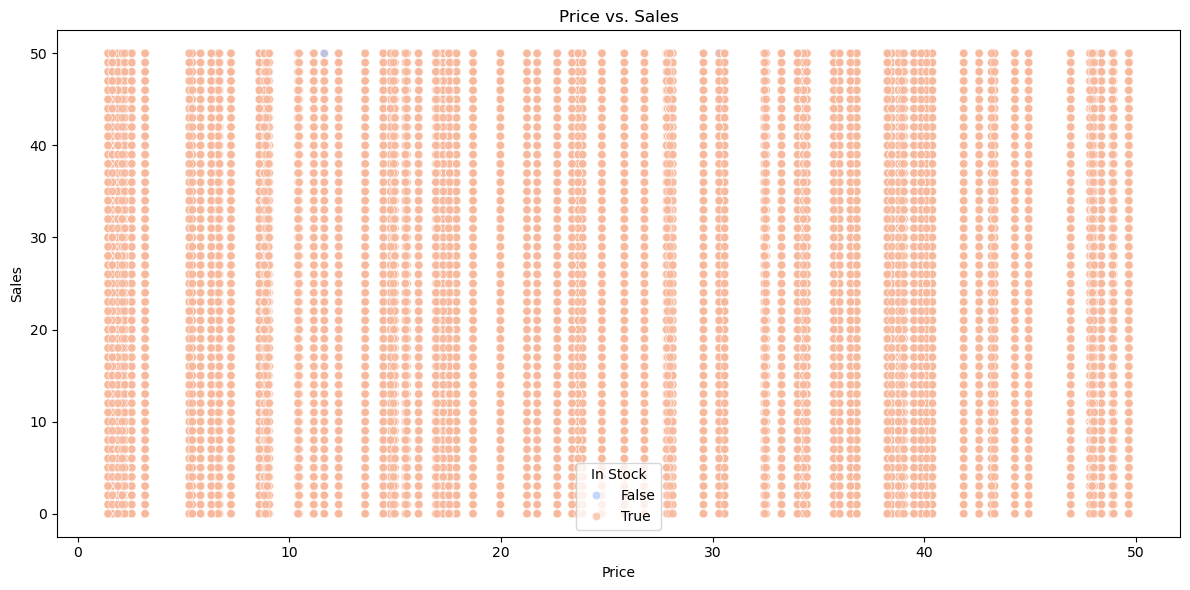

In [12]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Price', y='Sales', hue='In Stock', palette='coolwarm', alpha=0.7)
plt.title('Price vs. Sales')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

/var/folders/m5/flclr2h56f56f4j7mr5_8qk80000gn/T/ipykernel_54039/3650366243.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Day', y='Revenue', palette='Set2', order=[


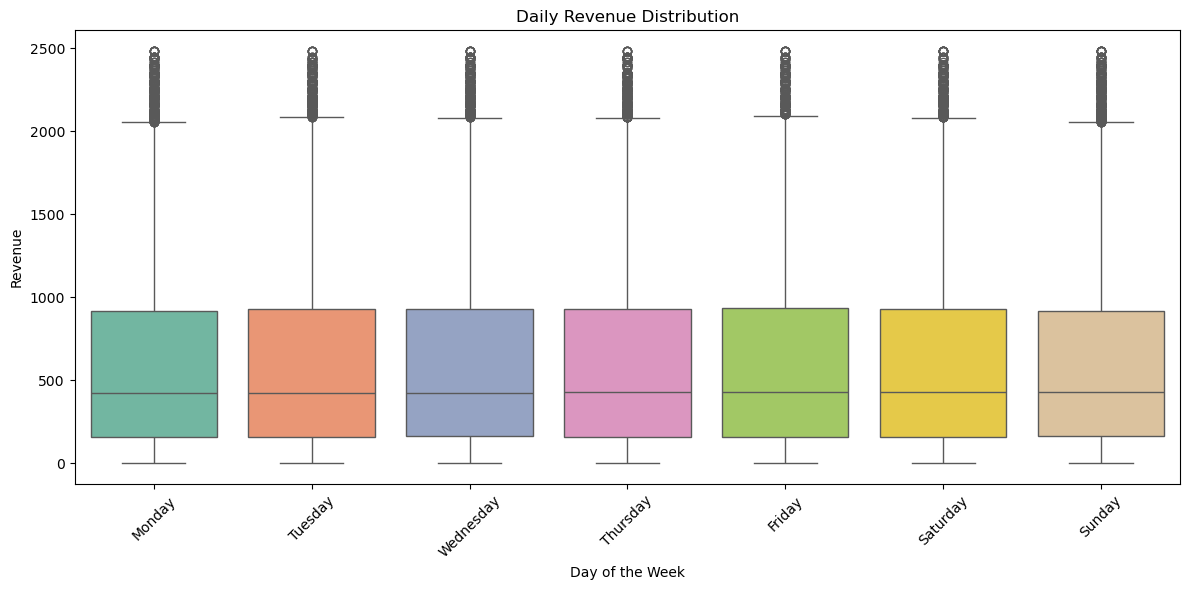

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Day', y='Revenue', palette='Set2', order=[
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title('Daily Revenue Distribution')
plt.xlabel('Day of the Week')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

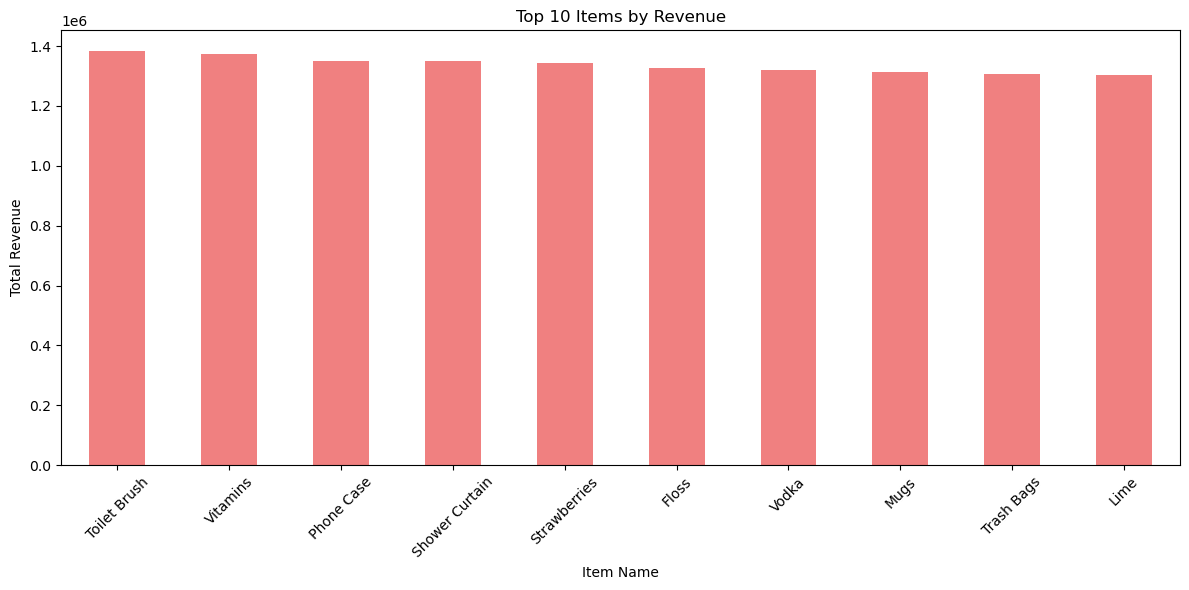

In [14]:
revenue_by_item = data.groupby('Item Name')['Revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
revenue_by_item.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Items by Revenue')
plt.xlabel('Item Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()